## Time Series Experimentの予測結果確認
- Time Series Experimentの予測結果の確認(テストデータにおける結果をまとめて確認したい)
    - Group別、精度指標
    - Group別、時系列プロット

In [1]:
import os
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import driverlessai

In [3]:
# Driverless AIのuser nameとpasswordの読み込み
import json
with open('idpass.json') as f:
    idpass = json.load(f)

In [4]:
# Driverless AIサーバーへの接続
dai = driverlessai.Client(address='http://3.87.69.161:12345', username=idpass['id'], password=idpass['pass'])
dai

<class 'driverlessai._core.Client'> http://3.87.69.161:12345

### Experimentの確認と取得

In [5]:
# 接続先Driverless AIのExperiments
dai.experiments.list()

    | Type       | Key                                  | Name
----+------------+--------------------------------------+---------------
  0 | Experiment | 9fdcbbca-853a-11eb-afb9-0242ac110002 | c1_no_rmse
  1 | Experiment | 4629e1c6-8525-11eb-afb9-0242ac110002 | c1_no
  2 | Experiment | 9b9ac016-8521-11eb-afb9-0242ac110002 | cc1
  3 | Experiment | 5358afe2-82b6-11eb-b42a-0242ac110002 | imb2.fix
  4 | Experiment | 60913d84-823c-11eb-b626-0242ac110002 | imb3
  5 | Experiment | ee6e1e34-822c-11eb-b626-0242ac110002 | imb2
  6 | Experiment | 8f99d742-822a-11eb-b626-0242ac110002 | imb1
  7 | Experiment | 67a26bb0-7fcc-11eb-aca6-0242ac110002 | kafalupa
  8 | Experiment | 04ee51a2-77f5-11eb-ae7b-0242ac110002 | 1.kedefohi
  9 | Experiment | 33984388-77ef-11eb-ae7b-0242ac110002 | kedefohi
 10 | Experiment | 8959fc3a-76f0-11eb-a90c-0242ac110002 | 1.gomavole
 11 | Experiment | 6bc656d8-73e3-11eb-ab9b-0242ac110002 | test2
 12 | Experiment | 60030ea8-73d5-11eb-ab9b-0242ac110002 | test1
 13 | Experim

In [6]:
# 利用するExperimentの取得
experiment = dai.experiments.get(key='60030ea8-73d5-11eb-ab9b-0242ac110002')
# 12 | Experiment | 60030ea8-73d5-11eb-ab9b-0242ac110002 | test1
type(experiment)

driverlessai._experiments.Experiment

In [7]:
# Experiment結果のサマリ
experiment.summary()

Status: Complete
Experiment: test1 (60030ea8-73d5-11eb-ab9b-0242ac110002)
  Version: 1.9.1, 2021-02-21 00:16
  Settings: 8/4/8, seed=962482440, GPUs disabled
  Train data: walmart_ts_6_fcst_grp_train.csv (702, 10)
  Validation data: N/A
  Test data: [Test] (36, 9)
  Target column: Weekly_Sales (regression)
System specs: Docker/Linux, 31 GB, 8 CPU cores, 0/0 GPU
  Max memory usage: 1.19 GB, 0 GB GPU
Recipe: AutoDL (79 iterations, 8 individuals)
  Validation scheme: time-based, 4 internal holdouts
  Feature engineering: 1726 features scored (7 selected)
Timing: MOJO latency: 0.09093 millis (1.5MB)
  Data preparation: 5.25 secs
  Shift/Leakage detection: 2.45 secs
  Model and feature tuning: 518.56 secs (157 models trained)
  Feature evolution: 1379.70 secs (644 of 672 models trained)
  Final pipeline training: 20.87 secs (1 model trained)
  Python / MOJO scorer building: 41.02 secs / 13.49 secs
Validation score: RMSE = 9664.004 (constant preds of 4.012e+04)
Validation score: RMSE = 3059.

In [8]:
# Experimentのデータ
experiment.datasets

{'train_dataset': <class 'Dataset'> 5eb74434-73d4-11eb-ab9b-0242ac110002 walmart_ts_6_fcst_grp_train.csv,
 'validation_dataset': None,
 'test_dataset': <class 'Dataset'> 5eb6cfc2-73d4-11eb-ab9b-0242ac110002 walmart_ts_6_fcst_grp_test.csv}

### DAIにアップされているデータの確認と取得

In [9]:
# 接続先Driverless AIのDatasets
dai.datasets.list()

    | Type    | Key                                  | Name
----+---------+--------------------------------------+--------------------------------------------------------
  0 | Dataset | ec7e8dc0-8524-11eb-afb9-0242ac110002 | cust_c_modeling_noOtc_train_20210315.csv
  1 | Dataset | ebb61af2-8524-11eb-afb9-0242ac110002 | cust_c_modeling_noOtc_test_20210315.csv
  2 | Dataset | 0cea8ab0-851f-11eb-afb9-0242ac110002 | cust_c_modeling_train_20210315.csv
  3 | Dataset | 0c653b94-851f-11eb-afb9-0242ac110002 | cust_c_modeling_test_20210315.csv
  4 | Dataset | 18aa6f52-8211-11eb-b626-0242ac110002 | sample_simple_imbalance.csv
  5 | Dataset | 4169f86e-7fcc-11eb-aca6-0242ac110002 | long_train_20210308.csv
  6 | Dataset | 3f6ec2a6-7fcc-11eb-aca6-0242ac110002 | long_test_20210308.csv
  7 | Dataset | c11cc064-7c75-11eb-8063-0242ac110002 | 2019.0709watcher__watcher4_utf8.csv
  8 | Dataset | 97619466-7c75-11eb-8063-0242ac110002 | 2018_0709watcher__watcher4_utf8.csv
  9 | Dataset | 2169995e-7bdd-11eb-8a

In [10]:
# スコアリングを実施するデータの取得
data_to_predict = dai.datasets.get(key='5eb6cfc2-73d4-11eb-ab9b-0242ac110002')
# 18 | Dataset | 5eb6cfc2-73d4-11eb-ab9b-0242ac110002 | walmart_ts_6_fcst_grp_test.csv
type(data_to_predict)

driverlessai._datasets.Dataset

In [11]:
data_to_predict.shape

(36, 11)

In [12]:
data_to_predict.head()

Store,Dept,Date,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,sample_weight
4,4,2012/5/4,60576.4,13737.9,-1,93.65,6993.97,4541.89,False,True
4,4,2012/5/11,57583.9,20499.9,86,103.05,5005.96,3815.16,False,True
4,4,2012/5/18,60832.9,6531.12,-1,99.91,2290.18,2521.84,False,True
4,4,2012/5/25,57781.9,4330.02,436,862.31,3268.41,3749.53,False,True
4,4,2012/6/1,62758.5,10165.2,8.6,47.93,2676.33,4896.34,False,True


#### pandas.DataFrameでデータ確認

In [13]:
# クライアント実行ディレクトリ上にデータのDLと、パス（ファイル名）の取得
local_path = data_to_predict.download(dst_dir='', overwrite=True)   # Client実行パス上へDL

Downloaded 'walmart_ts_6_fcst_grp_test.csv.1613864152.700513.csv'


In [14]:
df_test = pd.read_csv(local_path)
type(df_test)

pandas.core.frame.DataFrame

In [15]:
df_test.shape

(36, 11)

In [16]:
df_test.describe()

,Store,Dept,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,sample_weight
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0,36.0
mean,12.666667,9.833333,41219.515833,10495.218056,73.827778,199.830556,2763.526389,5088.300000,0.0,1.0
std,10.220428,3.484660,10722.794463,4433.167101,141.509609,268.832696,1964.497878,3010.273333,0.0,0.0
min,1.000000,4.000000,23516.130000,2989.940000,-1.000000,1.010000,148.750000,2044.720000,0.0,1.0
25%,4.000000,8.000000,35972.912500,7394.110000,-1.000000,36.015000,1399.100000,3254.907500,0.0,1.0
50%,10.500000,10.500000,41275.320000,10395.235000,-1.000000,78.440000,2366.660000,4376.860000,0.0,1.0
75%,19.000000,13.000000,44199.890000,12662.392500,86.000000,279.780000,3452.015000,5906.930000,0.0,1.0
max,31.000000,13.000000,62758.520000,21290.130000,532.000000,1095.850000,7557.140000,17903.640000,0.0,1.0


In [17]:
print(df_test.nunique())

Store             6
Dept              3
Date              6
Weekly_Sales     36
MarkDown1        36
MarkDown2        14
MarkDown3        36
MarkDown4        36
MarkDown5        36
IsHoliday         1
sample_weight     1
dtype: int64


In [18]:
# DLしたファイルを削除
os.remove(local_path)

### 予測

In [19]:
# data_to_predictに対するスコアリングを実施
dai_predictions = experiment.predict(dataset=data_to_predict, include_columns=data_to_predict.columns)

Complete


In [20]:
# クライアント実行ディレクトリ上にデータのDLと、パス（ファイル名）の取得
local_path = dai_predictions.download(dst_dir='', overwrite=True)   # Client実行パス上へDL

Downloaded '60030ea8-73d5-11eb-ab9b-0242ac110002_preds_94a7a19c.csv'


In [22]:
df_scored = pd.read_csv(local_path)
print(df_scored.shape)
df_scored.head()

(36, 14)


,Store,Dept,Date,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,sample_weight,Weekly_Sales.predicted,Weekly_Sales.predicted.lower,Weekly_Sales.predicted.upper
0,4,4,2012/5/4,60576.41,13737.91,-1.0,93.65,6993.97,4541.89,0,1,61616.300,57133.427490,69878.614337
1,4,4,2012/5/11,57583.94,20499.88,86.0,103.05,5005.96,3815.16,0,1,58854.586,54371.712646,67116.899493
2,4,4,2012/5/18,60832.91,6531.12,-1.0,99.91,2290.18,2521.84,0,1,58565.293,54082.419677,66827.606524
3,4,4,2012/5/25,57781.87,4330.02,436.0,862.31,3268.41,3749.53,0,1,58622.414,54139.540771,66884.727618
4,4,4,2012/6/1,62758.52,10165.22,8.6,47.93,2676.33,4896.34,0,1,58578.832,54095.958740,66841.145587


#### 精度評価

[sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [23]:
# DataFrameにグループ別でsklearn.metricsを適用する方法
df_scored.groupby(['Store','Dept'],).apply(lambda group: metrics.mean_squared_error(group['Weekly_Sales'], group['Weekly_Sales.predicted']))

Store  Dept
1      13      2.632013e+06
4      4       7.575833e+06
8      13      1.527327e+06
13     8       5.026340e+06
19     8       3.247411e+06
31     13      2.838870e+06
dtype: float64

In [24]:
# 関数化
def get_score_by_group(group_cols: list, actual_col: str, pred_col: str, df: pd.DataFrame, meric: metrics, score_name='score') -> pd.DataFrame: 
    ''' Return sklearn.metrics.*** by group_cols
    '''
    res = df.groupby(group_cols).apply(lambda group: meric(group[actual_col], group[pred_col]))
    res = pd.DataFrame(res).reset_index()
    res = res.rename(columns={0: score_name})
    return res

In [25]:
# Mean Squared Error
mse = get_score_by_group(group_cols=['Store','Dept'],  actual_col='Weekly_Sales', pred_col='Weekly_Sales.predicted', df=df_scored, meric=metrics.mean_squared_error, score_name='MSE')
display(mse)
# Mean Absolute Error
mae = get_score_by_group(group_cols=['Store','Dept'],  actual_col='Weekly_Sales', pred_col='Weekly_Sales.predicted', df=df_scored, meric=metrics.mean_absolute_error, score_name='MAE')
display(mae)
# Mean Absolute Percent Error
mape = get_score_by_group(group_cols=['Store','Dept'],  actual_col='Weekly_Sales', pred_col='Weekly_Sales.predicted', df=df_scored, meric=metrics.mean_squared_error, score_name='MAPE')
display(mape)

,Store,Dept,MSE
0,1,13,2.632013e+06
1,4,4,7.575833e+06
2,8,13,1.527327e+06
3,13,8,5.026340e+06
4,19,8,3.247411e+06
5,31,13,2.838870e+06


,Store,Dept,MAE
0,1,13,1292.421833
1,4,4,2334.590833
2,8,13,1000.556500
3,13,8,1949.740000
4,19,8,1451.824333
5,31,13,1133.924833


,Store,Dept,MAPE
0,1,13,2.632013e+06
1,4,4,7.575833e+06
2,8,13,1.527327e+06
3,13,8,5.026340e+06
4,19,8,3.247411e+06
5,31,13,2.838870e+06


#### 予測値実測値の時系列プロット

In [100]:
def plot_actual_plot_overlay(group_cols: list, actual_col: str, pred_col: str, time_col: str, df: pd.DataFrame, fig_size=(10,1.5)):
    df_groups = df[group_cols].drop_duplicates().reset_index(drop=True)  # グループ変数でのユニークな組み合わせDataFrame
    print('組み合わせのグループ数とグループ変数の数：{}'.format(df_groups.shape))
    for _, row in df_groups.iterrows(): # ユニークな組み合わせを一行ずつ
        title = [str(col)+':'+str(val) for val,col in zip(row, group_cols)]
        df_subset = df
        for filter_val, col in zip(row, group_cols):  # group_colsでループさせ、必要な組み合わせにデータを絞る
            df_subset = df_subset[df_subset[col]==filter_val]
        plt.figure(figsize=fig_size)
        plt.plot(subset_data[time_col], subset_data[actual_col])   # 実測
        plt.plot(subset_data[time_col], subset_data[pred_col], linestyle='dashed')    # 予測
        plt.title(title)

組み合わせのグループ数とグループ変数の数：(6, 2)


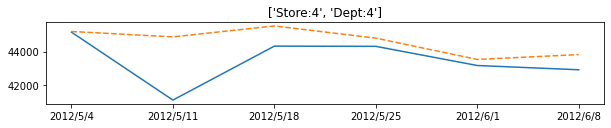

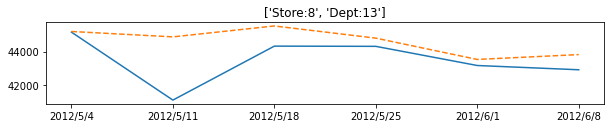

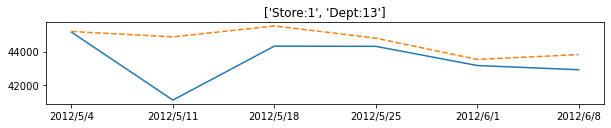

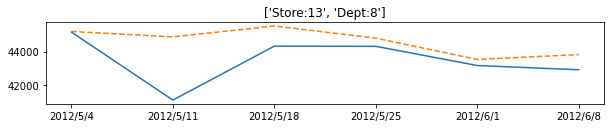

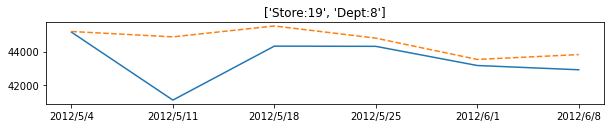

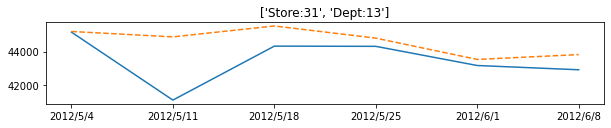

In [101]:
plot_actual_plot_overlay(group_cols=['Store','Dept'],  
                         actual_col='Weekly_Sales', pred_col='Weekly_Sales.predicted', time_col='Date', df=df_scored)

In [93]:
# DLしたファイルを削除
os.remove(local_path)

### MLI

In [95]:
# 接続先Driverless AIのMLI　（iid table）
dai.mli.iid.list()

    | Type           | Key                                  | Name
----+----------------+--------------------------------------+----------
  0 | Interpretation | e7a3f9ba-8548-11eb-afb9-0242ac110002 | wapenige
  1 | Interpretation | 609eadea-8532-11eb-afb9-0242ac110002 | dekuhima
  2 | Interpretation | 5e5ed168-8532-11eb-afb9-0242ac110002 | logegimu
  3 | Interpretation | 6ca23e6c-7fcf-11eb-aca6-0242ac110002 | vamecihi
  4 | Interpretation | 8a8b200a-7cab-11eb-83fe-0242ac110002 | fomodatu
  5 | Interpretation | b495ad5e-77ef-11eb-ae7b-0242ac110002 | bubowafe
  6 | Interpretation | b3aca93c-76f6-11eb-a90c-0242ac110002 | kabasoho
  7 | Interpretation | d7236050-73f3-11eb-ab9b-0242ac110002 | rakehufa
  8 | Interpretation | f3f4390e-65d7-11eb-b5cf-0242ac110002 | vocodolu
  9 | Interpretation | 2b8e1486-6077-11eb-b16e-0242ac110002 | wesehobu
 10 | Interpretation | f382aa5c-5c89-11eb-a8f5-0242ac110002 | danonaru

In [96]:
# 接続先Driverless AIのMLI　（Time series）
dai.mli.timeseries.list()

    | Type           | Key                                  | Name
----+----------------+--------------------------------------+----------
  0 | Interpretation | e7a3f9ba-8548-11eb-afb9-0242ac110002 | wapenige
  1 | Interpretation | 609eadea-8532-11eb-afb9-0242ac110002 | dekuhima
  2 | Interpretation | 5e5ed168-8532-11eb-afb9-0242ac110002 | logegimu
  3 | Interpretation | 6ca23e6c-7fcf-11eb-aca6-0242ac110002 | vamecihi
  4 | Interpretation | 8a8b200a-7cab-11eb-83fe-0242ac110002 | fomodatu
  5 | Interpretation | b495ad5e-77ef-11eb-ae7b-0242ac110002 | bubowafe
  6 | Interpretation | b3aca93c-76f6-11eb-a90c-0242ac110002 | kabasoho
  7 | Interpretation | d7236050-73f3-11eb-ab9b-0242ac110002 | rakehufa

In [97]:
# MLIの取得
mli = dai.mli.timeseries.get(key='d7236050-73f3-11eb-ab9b-0242ac110002')
#  7 | Interpretation | d7236050-73f3-11eb-ab9b-0242ac110002 | rakehufa
type(mli)

driverlessai._mli.Interpretation

In [98]:
# MLIで作成されたファイル
mli.artifacts.list()

# Time seriesはlogしかDLできるものがない

['log']

In [99]:
# 実行パス上へDL
mli.artifacts.download()

Downloaded 'mli_experiment_timeseries_logs_d7236050-73f3-11eb-ab9b-0242ac110002.zip'


{'log': 'mli_experiment_timeseries_logs_d7236050-73f3-11eb-ab9b-0242ac110002.zip'}